In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import optuna
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv("training_data.csv")

In [5]:
data

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Summit,105,0,day_81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435
3137,Fayette,0,0,day_55,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
3138,Clark,147,0,day_106,929,0.000013,0.000105,0.001076,0.000009,0.000012,...,60.6,7.7,736,43625,25300,92.7,48.1,16.6,107300,0.865754
3139,Logan,0,0,day_1,144,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.5,5.8,766,49783,28346,90.7,55.2,13.7,127200,0.949363


In [6]:
columns = [
     "county", "cases", "deaths", "date_index_converted",
    "county_data_length", "total_pop", "percent_25_34", "percent_highschool",
    "labor_force_rate", "unemployment_rate", "median_housing_cost",
    "median_household_earnings", "median_worker_earnings", "percent_insured",
    "percent_married", "poverty_rate", "median_property_value", "percent_white"
]


#copy of the DataFrame to preserve the original data
data_copy = data.copy()

#dropping the non-topic awareness columns from the copy
data_without_selected_columns = data_copy.drop(columns=columns)

average_values = data_without_selected_columns.mean()

print("Average Value for all topic awareness\n", average_values)

average_values

Average Value for all topic awareness
 core_jaccard                                        0.000031
core_cosine                                         0.000188
core_intersection                                   0.002652
social_jaccard                                      0.000026
politics_jaccard                                    0.000018
                                                      ...   
entertainment_intersection_normalized               0.016326
politics_republican_hate_intersection_normalized    0.002337
politics_democratic_hate_intersection_normalized    0.002092
health_intersection_normalized                      0.000305
illness_intersection_normalized                     0.014423
Length: 126, dtype: float64


core_jaccard                                        0.000031
core_cosine                                         0.000188
core_intersection                                   0.002652
social_jaccard                                      0.000026
politics_jaccard                                    0.000018
                                                      ...   
entertainment_intersection_normalized               0.016326
politics_republican_hate_intersection_normalized    0.002337
politics_democratic_hate_intersection_normalized    0.002092
health_intersection_normalized                      0.000305
illness_intersection_normalized                     0.014423
Length: 126, dtype: float64

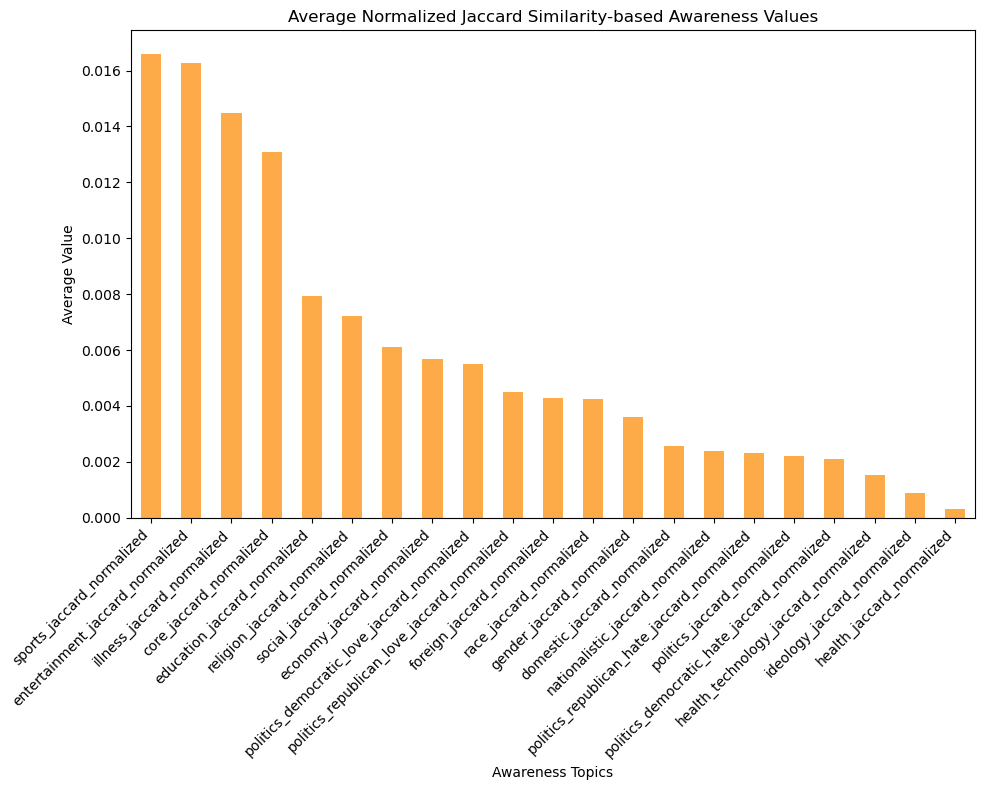

In [7]:
#identifying jaccard_columns
jaccard_columns = [i for i in average_values.index if "jaccard_normalized" in i]

# Select the average values for the jaccard_columns
jaccard_averages = average_values.loc[jaccard_columns]

# Sort jaccard_averages from highest to lowest
jaccard_averages_sorted = jaccard_averages.sort_values(ascending=False)

#Plotting
plt.figure(figsize=(10, 8))
jaccard_averages_sorted.plot(kind='bar', color = '#fdaa48')  # Use sorted values for plotting
plt.title('Average Normalized Jaccard Similarity-based Awareness Values')
plt.ylabel('Average Value')
plt.xlabel('Awareness Topics')
plt.xticks(rotation=45, ha="right")
plt.tight_layout() 

plt.show()

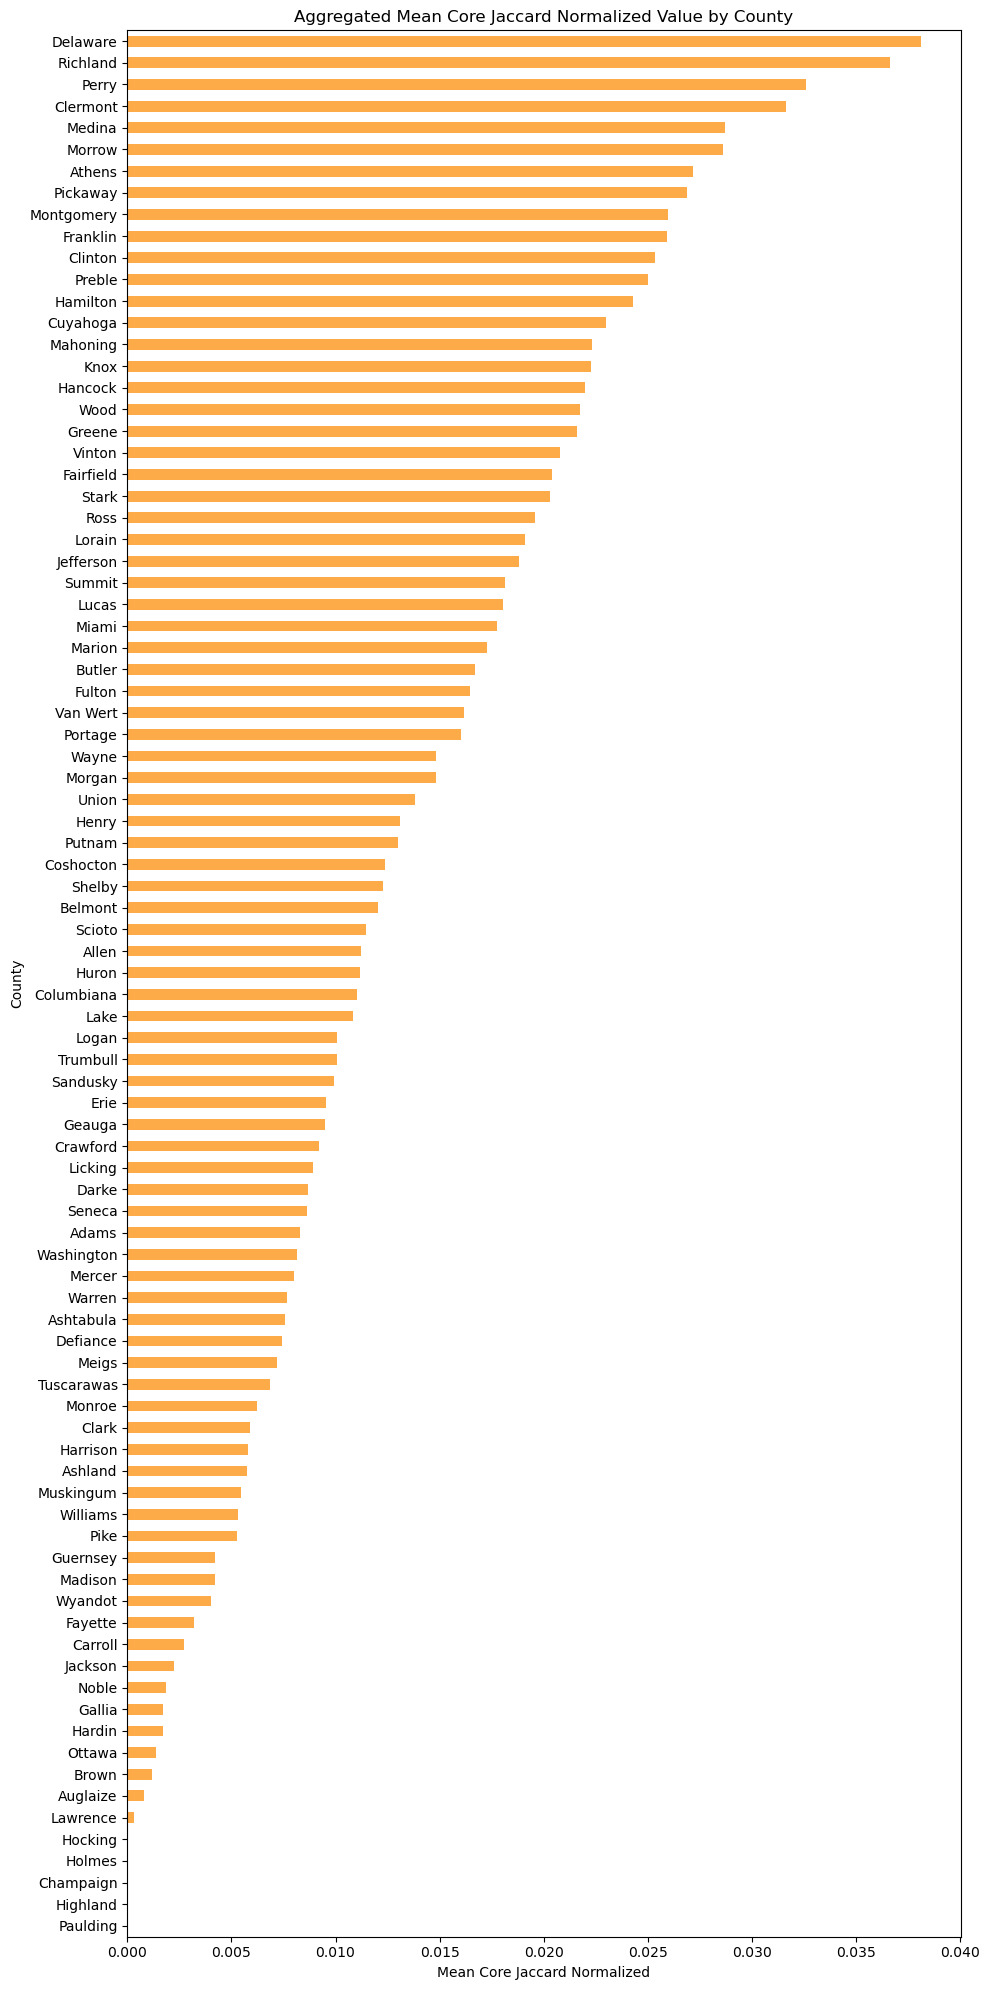

In [8]:
# Aggregate the mean of core_jaccard_normalized by county
mean_core_jaccard_by_county = data.groupby('county')['core_jaccard_normalized'].mean().sort_values(ascending=False)

# Plotting the results vertically
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))  # Adjust figure size as needed for better fit and readability
mean_core_jaccard_by_county.plot(kind='barh', color = '#fdaa48')  # 'barh' makes the bar chart horizontal
plt.title('Aggregated Mean Core Jaccard Normalized Value by County')
plt.xlabel('Mean Core Jaccard Normalized')  # x-label should be the measurement
plt.ylabel('County')  # y-label should be the categories, in this case, the county names
plt.xticks(rotation=0)  # No need to rotate vertical chart labels
plt.tight_layout()  # Adjust layout to not cut off labels

plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top
plt.show()



In [9]:
# Calculate total cases and deaths by county
total_cases_deaths = data.groupby('county').agg(
    total_cases=('cases', 'sum'),
    total_deaths=('deaths', 'sum'),
    total_population=('total_pop', 'mean')  #to account for population data to 
                                            #be duplicated across rows for the same county
)

# Calculate per capita metrics
total_cases_deaths['cases_per_capita'] = total_cases_deaths['total_cases'] / total_cases_deaths['total_population']
total_cases_deaths['deaths_per_capita'] = total_cases_deaths['total_deaths'] / total_cases_deaths['total_population']


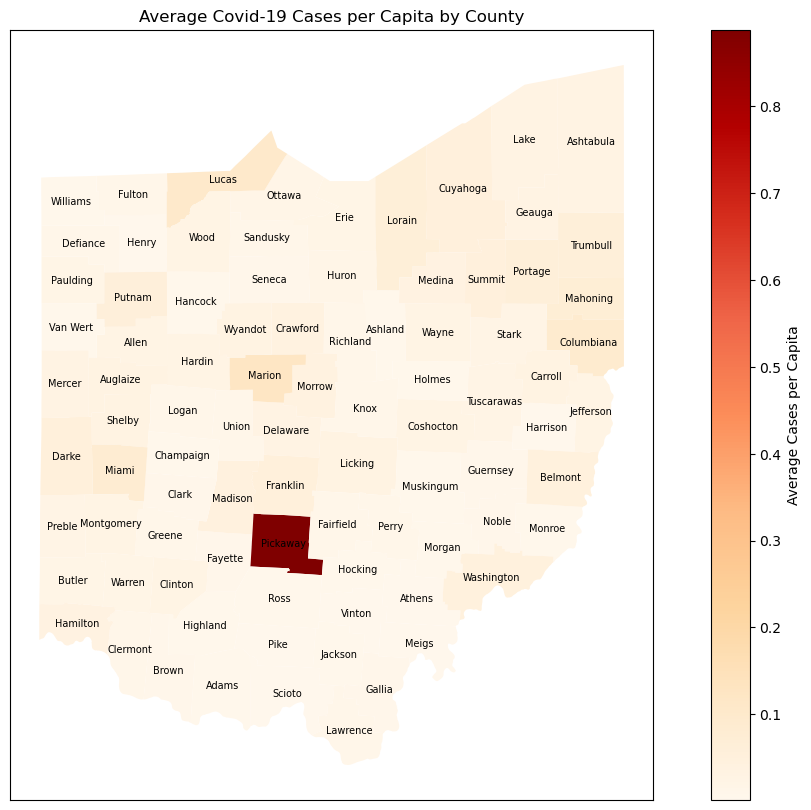

In [10]:
import geopandas as gpd

# Load Ohio counties shapefile or GeoJSON
ohio_counties = gpd.read_file('GU_CountyOrEquivalent.shp')

# Merge the GeoDataFrame with your data
map_data = ohio_counties.merge(total_cases_deaths, left_on='county_nam', right_on='county', how='left')

# Find the range for color bar
min_cases = map_data['cases_per_capita'].min()
max_cases = map_data['cases_per_capita'].max()

plt.figure(figsize=(15, 10))
ax = plt.gca()  # Get current axis

# Plot average cases per capita
map_data.plot(column='cases_per_capita', legend=True,
              legend_kwds={'label': 'Average Cases per Capita'},
              cmap='OrRd', ax=ax, vmin=min_cases, vmax=max_cases)
plt.title('Average Covid-19 Cases per Capita by County')

# Remove axis number labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# Annotate county names
for _, row in map_data.iterrows():
    # Calculating the centroid of each polygon to find where to place the text
    centroid = row.geometry.centroid
    text = row['county_nam']
    
    # Place text on the plot
    ax.text(centroid.x, centroid.y, text, fontsize=7, ha='center', va='center')

plt.show()



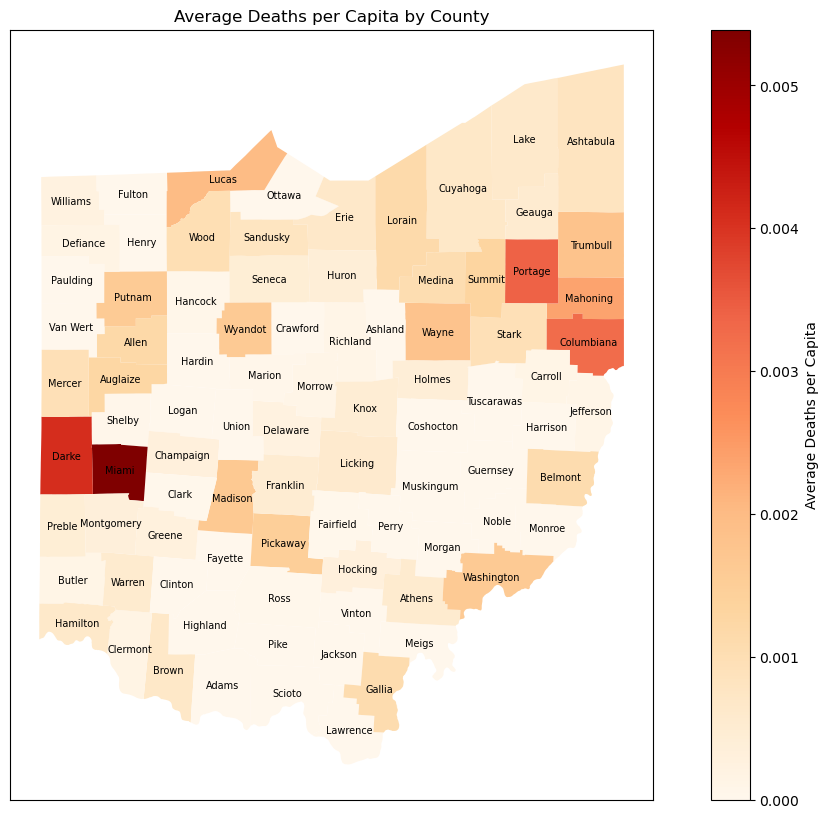

In [11]:
## Deaths  per capita

# Find the range for color bar
min_cases = map_data['deaths_per_capita'].min()
max_cases = map_data['deaths_per_capita'].max()

plt.figure(figsize=(15, 10))
ax = plt.gca()  # Get current axis

# Plot average deaths per capita 
map_data.plot(column='deaths_per_capita', legend=True,
              legend_kwds={'label': 'Average Deaths per Capita'},
              cmap='OrRd', ax=ax, vmin=min_cases, vmax=max_cases)
plt.title('Average Deaths per Capita by County')

# Remove axis number labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# Annotate county names
for _, row in map_data.iterrows():
    # Calculating the centroid of each polygon to find where to place the text
    centroid = row.geometry.centroid
    text = row['county_nam']
    
    # Place text on the plot
    ax.text(centroid.x, centroid.y, text, fontsize=7, ha='center', va='center')

plt.show()




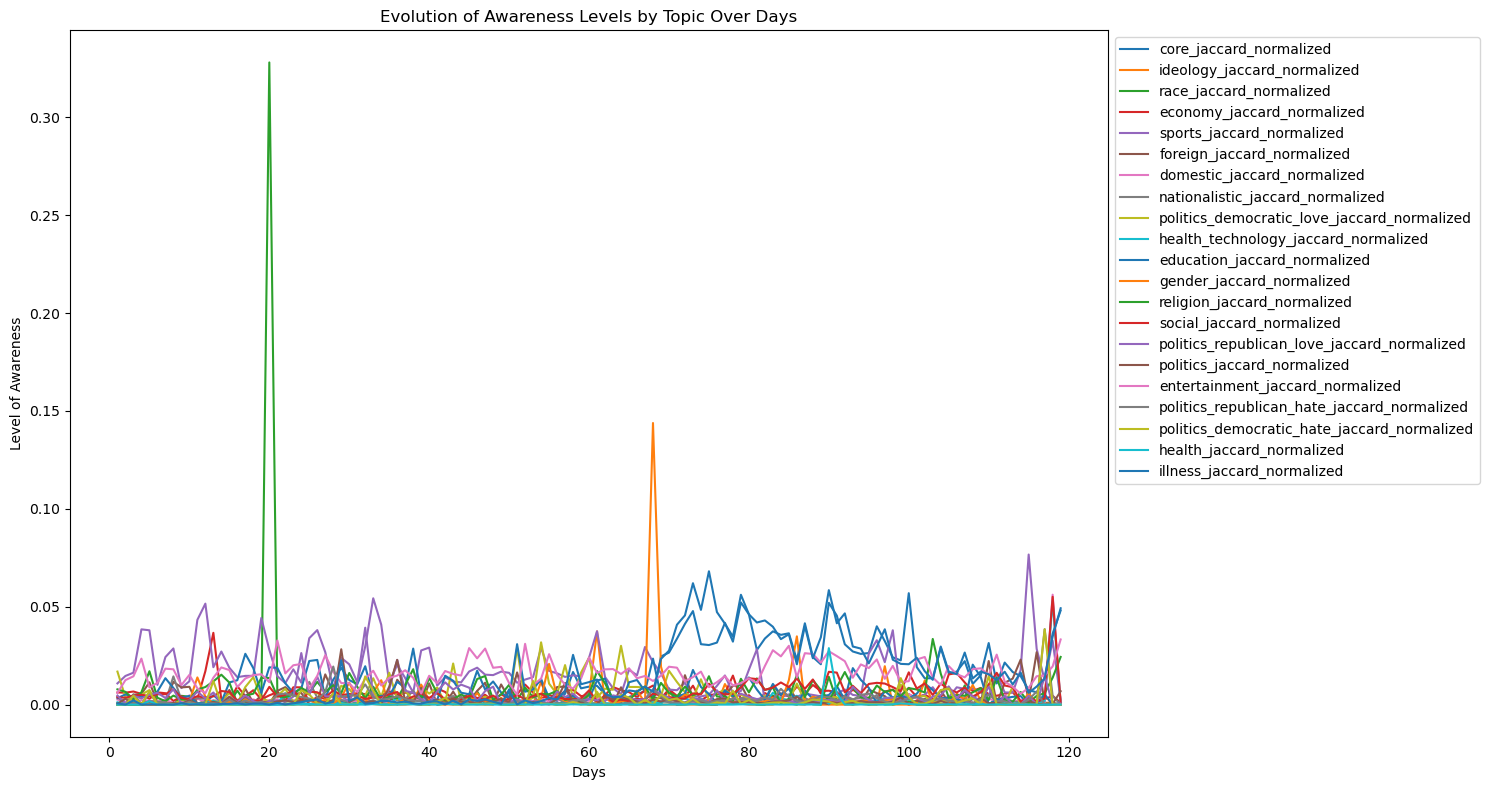

In [12]:
# Convert 'date_index_converted' to a continuous sequence of days.
# Assuming 'day_index_converted' follows a format like 'day_X' where X is the day number.
data['day_index_converted'] = data['date_index_converted'].str.extract('day_(\d+)').astype(int)

# Group by this new day index and calculate the mean for Jaccard-related columns.
# Assuming that all columns of interest contain the word 'jaccard'.
jaccard_columns = [i for i in data.columns if 'jaccard_normalized' in i]
daily_averages = data.groupby('day_index_converted')[jaccard_columns].mean()

# Plotting the results
plt.figure(figsize=(20, 8))
for col in daily_averages.columns:
    plt.plot(daily_averages.index, daily_averages[col], label=col)

plt.title('Evolution of Awareness Levels by Topic Over Days')
plt.xlabel('Days')
plt.ylabel('Level of Awareness')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the plot
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the rect to prevent cutting off
plt.show()


In [16]:
daily_averages.loc[20] # to see which topic awareness had the peak at day 20, it was race. 

core_jaccard_normalized                        0.000041
ideology_jaccard_normalized                    0.000000
race_jaccard_normalized                        0.327996
economy_jaccard_normalized                     0.004740
sports_jaccard_normalized                      0.027981
foreign_jaccard_normalized                     0.000240
domestic_jaccard_normalized                    0.002252
nationalistic_jaccard_normalized               0.000260
politics_democratic_love_jaccard_normalized    0.001737
health_technology_jaccard_normalized           0.000116
education_jaccard_normalized                   0.019048
gender_jaccard_normalized                      0.001105
religion_jaccard_normalized                    0.013586
social_jaccard_normalized                      0.009057
politics_republican_love_jaccard_normalized    0.001931
politics_jaccard_normalized                    0.000619
entertainment_jaccard_normalized               0.011434
politics_republican_hate_jaccard_normalized    0

In [19]:
daily_averages.loc[68] #to see to which variable the orange line peaked around day 68, it was gender. 

core_jaccard_normalized                        0.003906
ideology_jaccard_normalized                    0.000000
race_jaccard_normalized                        0.000000
economy_jaccard_normalized                     0.009722
sports_jaccard_normalized                      0.021603
foreign_jaccard_normalized                     0.003550
domestic_jaccard_normalized                    0.002777
nationalistic_jaccard_normalized               0.001779
politics_democratic_love_jaccard_normalized    0.001368
health_technology_jaccard_normalized           0.001214
education_jaccard_normalized                   0.023490
gender_jaccard_normalized                      0.143830
religion_jaccard_normalized                    0.002674
social_jaccard_normalized                      0.005559
politics_republican_love_jaccard_normalized    0.007803
politics_jaccard_normalized                    0.002564
entertainment_jaccard_normalized               0.012070
politics_republican_hate_jaccard_normalized    0

In [22]:
daily_averages.loc[74] #to see to which variable the blue lines peaking around day 65 correspond to. It was illness and core 

core_jaccard_normalized                        0.030861
ideology_jaccard_normalized                    0.000087
race_jaccard_normalized                        0.000000
economy_jaccard_normalized                     0.002143
sports_jaccard_normalized                      0.004165
foreign_jaccard_normalized                     0.000082
domestic_jaccard_normalized                    0.000963
nationalistic_jaccard_normalized               0.001079
politics_democratic_love_jaccard_normalized    0.012945
health_technology_jaccard_normalized           0.003029
education_jaccard_normalized                   0.009005
gender_jaccard_normalized                      0.002011
religion_jaccard_normalized                    0.005677
social_jaccard_normalized                      0.005248
politics_republican_love_jaccard_normalized    0.002738
politics_jaccard_normalized                    0.001569
entertainment_jaccard_normalized               0.016852
politics_republican_hate_jaccard_normalized    0

# Predictive Model

In [23]:
# Initial Benchmarking XGBOoost

#encoding the "county" column
data=pd.read_csv("training_data.csv")


# extracting the numeric data index
data['date_index'] = data['date_index_converted'].str.extract('day_(\d+)').astype(int)

#One Hot-Encoding of the counties
data_encod=pd.get_dummies(data, columns=['county'])


# droping the cases and date_index_converted column
X = data_encod.drop(['cases', 'date_index_converted'], axis=1) 
y = data_encod['cases']

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#initialize and train the XGBoost model with not much modified parameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgb_model.fit(X_train, y_train)

#evaluating the model
predictions = xgb_model.predict(X_test)

#calculate RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

rmse, mae, r2

(247.9241674753857, 39.04443016803608, 0.9011972949314704)

In [24]:
data_encod

,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,...,county_Tuscarawas,county_Union,county_Van Wert,county_Vinton,county_Warren,county_Washington,county_Wayne,county_Williams,county_Wood,county_Wyandot
0,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,0.000053,...,False,False,False,False,False,False,False,False,False,False
1,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,0.000000,...,False,False,False,False,False,False,True,False,False,False
3,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,105,0,day_81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,0.000003,...,False,False,False,False,False,False,False,False,False,False
3137,0,0,day_55,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
3138,147,0,day_106,929,0.000013,0.000105,0.001076,0.000009,0.000012,0.000000,...,False,False,False,False,False,False,False,False,False,False
3139,0,0,day_1,144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [15]:
#Hyperparameter tuning of XGBoost using Optuna 
X=np.array(X)
def objective(trial):
    # paramter to tune
    params = {
        'num_boost_round': trial.suggest_int('num_boost_round',50, 1200),
        'objective': 'reg:squarederror',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 10, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 10, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'eta': trial.suggest_float('eta', 0.01, 0.6),
        'gamma': trial.suggest_float('gamma', 1e-8, 10, log=True),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    }
    
    if params['booster'] == 'dart':
        params['sample_type'] = trial.suggest_categorical('sample_type', ['uniform', 'weighted'])
        params['normalize_type'] = trial.suggest_categorical('normalize_type', ['tree', 'forest'])
        params['rate_drop'] = trial.suggest_float('rate_drop', 1e-8, 1.0, log=True)
        params['skip_drop'] = trial.suggest_float('skip_drop', 1e-8, 1.0, log=True)

    # cross valdiation for each combination of hyper parameters
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)

        model = xgb.train(params, dtrain, verbose_eval=True)
        preds = model.predict(dtest)
        rmse = r2_score(y_test, preds)
        rmse_list.append(rmse)

    avg_rmse = np.mean(rmse_list)
    return avg_rmse

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

print("Number of finished trials:", len(study.trials))
print("Best trial parameters:", study.best_trial.params)



/Users/dsalina2/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-03-31 14:39:35,518] A new study created in memory with name: no-name-60ad5332-0777-4e9b-a76a-13d733b1e07b
/Users/dsalina2/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [14:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dsalina2/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [14:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dsalina2/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [14:39:35] WARNING:

Number of finished trials: 1000
Best trial parameters: {'num_boost_round': 75, 'booster': 'gbtree', 'lambda': 0.0207317451574775, 'alpha': 0.7222586541401903, 'max_depth': 4, 'eta': 0.48917032731337345, 'gamma': 0.00012777714630394816, 'grow_policy': 'lossguide'}


In [25]:
#making predictions on the test data
#converting the data to DMatrix format
dtrain_t = xgb.DMatrix(X, label=y)


    # parameters for the XGBoost model with the optimal model submitted to Kaggle
params = {'num_boost_round': 75, 'booster': 'gbtree', 'lambda': 0.0207317451574775, 'alpha': 0.7222586541401903, 'max_depth': 4, 'eta': 0.48917032731337345, 'gamma': 0.00012777714630394816, 'grow_policy': 'lossguide'}
#xgb5 sumbission: {'num_boost_round': 116, 'booster': 'gbtree', 'lambda': 1.8299989842542644e-07, 'alpha': 1.1922477971422185e-05, 'max_depth': 4, 'eta': 0.25984258848893216, 'gamma': 0.0021229347698977956, 'grow_policy': 'depthwise'}
#{'num_boost_round': 861, 'booster': 'gbtree', 'lambda': 0.18157374973076446, 'alpha': 0.0009331743512427451, 'max_depth': 6, 'eta': 0.299619010424918, 'gamma': 0.0002329426952613048, 'grow_policy': 'depthwise'}
    #{'booster': 'dart', 'lambda': 0.005563731388138173, 'alpha': 0.09868669115870793, 'max_depth': 4, 'eta': 0.09537685003630735, 'gamma': 1.1123692881132767e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.9997775246148427e-05, 'skip_drop': 5.606735557509621e-06}

    # train model with all of the train data data
model = xgb.train(params, dtrain_t, verbose_eval=False)

# load the test data
test_data=pd.read_csv("test_data.csv")


# where X is the numeric day, we extract "X" and convert it to an integer
test_data['date_index'] = test_data['date_index_converted'].str.extract('day_(\d+)').astype(int)
# One hot encoding of counties in the test data
test_data_encod=pd.get_dummies(test_data, columns=['county'])

# drop some columns as done in the training data
Xt = test_data_encod.drop(['date_index_converted', 'index'], axis=1)  

test_preds=model.predict(xgb.DMatrix(Xt))
test_preds


C:\Users\mdlar\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


array([-4.6261275e-01,  2.7232846e+02,  5.4854164e+00, ...,
       -9.8373151e-01,  6.4155353e+02, -2.0465693e+00], dtype=float32)

In [17]:
# Formatting the results datafram for submission 
results=pd.DataFrame({'Index':test_data['index'],'Cases':test_preds})

# Transform the result target variable and set the lower value to be 0, that is set the negative values to 0
results['Cases']=results['Cases'].clip(lower=0)

# Save as a csv file
results.to_csv('predictions_xgb6.csv', index=False)

# describe the results
results['Cases'].describe()

count     7331.000000
mean       177.693115
std        953.483887
min          0.000000
25%          0.000000
50%          0.000000
75%         43.802010
max      13214.900391
Name: Cases, dtype: float64

In [22]:
data_encod

,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,...,county_Tuscarawas,county_Union,county_Van Wert,county_Vinton,county_Warren,county_Washington,county_Wayne,county_Williams,county_Wood,county_Wyandot
0,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,0.000053,...,0,0,0,0,0,0,0,0,0,0
1,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,105,0,day_81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,0.000003,...,0,0,0,0,0,0,0,0,0,0
3137,0,0,day_55,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3138,147,0,day_106,929,0.000013,0.000105,0.001076,0.000009,0.000012,0.000000,...,0,0,0,0,0,0,0,0,0,0
3139,0,0,day_1,144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


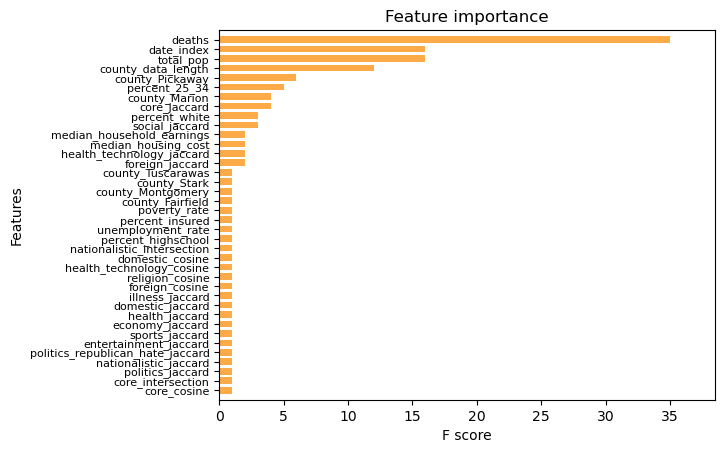

In [26]:
# feature importance plotting

ax=xgb.plot_importance(model, max_num_features=100, height=0.7, grid=False, show_values=False, color='#fdaa48')

for label in ax.get_yticklabels():
    label.set_size(8)


plt.show()